In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [59]:
df = pd.read_csv ('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [60]:
SEED = 1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [61]:
len(df_train), len(df_val), len(df_test)


(876, 293, 293)

In [62]:
cat = ['lead_source', 'industry', 'employment_status', 'location']


In [63]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

assert 'converted' not in df_train.columns
assert 'converted' not in df_val.columns
assert 'converted' not in df_test.columns

In [64]:
numeric = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']

In [28]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [29]:


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [31]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.8532423208191127

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [67]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.6996587030716723

In [68]:
thresholds = np.linspace(0, 1, 100)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.584
0.01 0.700
0.02 0.700
0.03 0.700
0.04 0.700
0.05 0.700
0.06 0.700
0.07 0.700
0.08 0.700
0.09 0.700
0.10 0.700
0.11 0.700
0.12 0.700
0.13 0.700
0.14 0.700
0.15 0.700
0.16 0.700
0.17 0.700
0.18 0.700
0.19 0.700
0.20 0.700
0.21 0.700
0.22 0.700
0.23 0.700
0.24 0.700
0.25 0.700
0.26 0.700
0.27 0.700
0.28 0.700
0.29 0.700
0.30 0.700
0.31 0.700
0.32 0.700
0.33 0.700
0.34 0.700
0.35 0.700
0.36 0.700
0.37 0.700
0.38 0.700
0.39 0.700
0.40 0.700
0.41 0.700
0.42 0.700
0.43 0.700
0.44 0.700
0.45 0.700
0.46 0.700
0.47 0.700
0.48 0.700
0.49 0.700
0.51 0.700
0.52 0.700
0.53 0.700
0.54 0.700
0.55 0.700
0.56 0.700
0.57 0.700
0.58 0.700
0.59 0.700
0.60 0.700
0.61 0.700
0.62 0.700
0.63 0.700
0.64 0.700
0.65 0.700
0.66 0.700
0.67 0.700
0.68 0.700
0.69 0.700
0.70 0.700
0.71 0.700
0.72 0.700
0.73 0.700
0.74 0.700
0.75 0.700
0.76 0.700
0.77 0.700
0.78 0.700
0.79 0.700
0.80 0.700
0.81 0.700
0.82 0.700
0.83 0.700
0.84 0.700
0.85 0.700
0.86 0.700
0.87 0.700
0.88 0.700
0.89 0.700
0.90 0.700
0.91 0.700

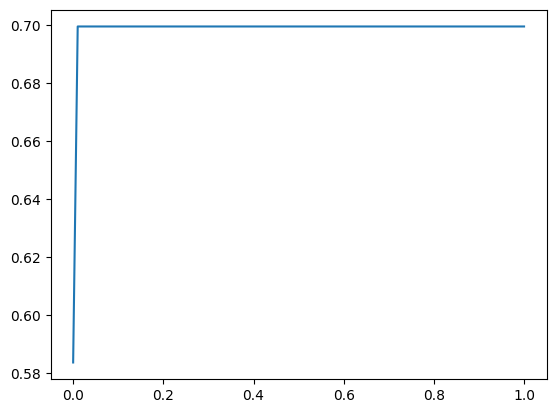

In [58]:
plt.plot(thresholds, scores)


In [47]:
from collections import Counter


In [48]:
Counter(y_pred >= 1.0)


Counter({np.True_: 245, np.False_: 48})

In [49]:
1 - y_val.mean()


np.float64(0.41638225255972694)

In [50]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [51]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [52]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [53]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 41,  81],
       [  7, 164]])

In [54]:
(confusion_matrix / confusion_matrix.sum()).round(2)


array([[0.14, 0.28],
       [0.02, 0.56]])

In [55]:
p = tp / (tp + fp)
p

np.float64(0.6693877551020408)

In [56]:
r = tp / (tp + fn)
r

np.float64(0.9590643274853801)